In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.optimizers import RMSprop

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
rm -rf ./logs/

In [4]:
path_train = "train.csv"
path_test = "test.csv"

In [5]:
df_train = pd.read_csv(path_train,delimiter=',', index_col=False)

training_labels = df_train.iloc[:,0].astype('int')
training_labels = np.array(training_labels)

training_images = df_train.iloc[:,1:]
training_images = np.array(training_images)
training_images = training_images.astype('float').reshape(training_images.shape[0], 28, 28)

In [6]:
df_test = pd.read_csv(path_test,delimiter=',', index_col=False)

testing_images = np.array(df_test)
testing_images = testing_images.astype('float').reshape(testing_images.shape[0], 28, 28)

In [7]:
X_train, X_test, y_train,y_test = train_test_split(training_images,training_labels,test_size=0.01,shuffle=True)

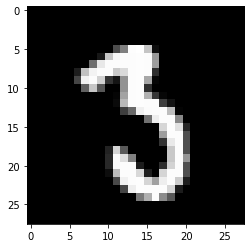

In [8]:
# Print example figure
fig = plt.figure
plt.imshow(X_train[12], cmap='gray')
plt.show()

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   rotation_range=0.2)

train_generator = train_datagen.flow(X_train,y_train,batch_size=128)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_generator = validation_datagen.flow(X_test,y_test,batch_size=128)

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<1e-6 and logs.get('accuracy')==1.0):
            print("Stop training!")
            self.model.stop_training=True

callbacks = myCallback()

In [12]:
# create model
def create_model():
    
    model = Sequential()
    model.add(Conv2D(128,(5,5),strides=(1, 1), padding='same',activation='relu',input_shape=(28,28,1)))
    model.add(Conv2D(128,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))
    model.add(Conv2D(64,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(Conv2D(64,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3)) 
    model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
        
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [13]:
# create model
# Max accuracy = 0.99453
# model = Sequential()
# model.add(Conv2D(128,(5,5),strides=(1, 1), padding='same',activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(128,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(64,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(Conv2D(64,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3)) 
# model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(Conv2D(32,(5,5),strides=(1, 1), padding='same',activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(10,activation='softmax'))

In [14]:
# from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

In [15]:
# save log file for Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [16]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# nn = KerasClassifier(build_fn=create_model, verbose=0)

# epochs = [100,300,500,700,1000]
# optimizers = ['adam','nadam']
# activations = ['relu','selu','elu']
# dropout1 = [0.1,0.2,0.25,0.3]
# dropout2 = [0.3,0.4,0.5]

# hyperparameters = dict(optimizer=optimizers, epochs=epochs,
#                        activation=activations, dropout1=dropout1,
#                        dropout2=dropout2)

# grid = GridSearchCV(estimator=nn, param_grid=hyperparameters)

# grid_result = grid.fit_generator(train_generator)

In [17]:
# print(grid_result.best_params_)

In [18]:
# optimizer_best = grid_result.best_params_['optimizer']
# epochs_best = grid_result.best_params_['epochs']
# activation_best = grid_result.best_params_['activation']
# dropout1_best = grid_result.best_params_['dropout1']
# dropout2_best = grid_result.best_params_['dropout2']

In [19]:
# model = create_model(optimizer_best)
# history = model.fit(X_train,y_train,
#                     validation_data=(X_test,y_test),
#                     epochs=epochs_best,verbose=0)

In [20]:
# Checkpoint Save only best model
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='loss',
#     mode='min',
#     save_best_only=True)

In [21]:
# model = create_model(optimizer_best,activation_best,
#                      dropout1_best,dropout2_best)

# history = model.fit_generator(train_generator,
#                     epochs=epochs_best,
#                     validation_data=test_generator,
#                     callbacks=[callbacks,learning_rate_reduction,tensorboard_callback])

In [22]:
model = create_model()

history = model.fit_generator(train_generator,
                    epochs=1000,
                    validation_data=test_generator,
                    callbacks=[callbacks,learning_rate_reduction,tensorboard_callback])

/home/pongsakorn/tensorflow2/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
325/325 [==============================] - 10s 23ms/step - loss: 0.5093 - accuracy: 0.8270 - val_loss: 0.0415 - val_accuracy: 0.9929
Epoch 2/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.1015 - accuracy: 0.9728 - val_loss: 0.0506 - val_accuracy: 0.9905
Epoch 3/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0712 - accuracy: 0.9806 - val_loss: 0.0324 - val_accuracy: 0.9952
Epoch 4/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0553 - accuracy: 0.9849 - val_loss: 0.0246 - val_accuracy: 0.9976
Epoch 5/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.0368 - val_accuracy: 0.9929
Epoch 6/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0456 - accuracy: 0.9878 - val_loss: 0.0374 - val_accuracy: 0.9929
Epoch 7/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0411 - accuracy: 0.9897 - val_loss: 0.0633 - val_a

325/325 [==============================] - 6s 19ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0122 - val_accuracy: 0.9976
Epoch 54/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0121 - val_accuracy: 0.9976
Epoch 55/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0120 - val_accuracy: 0.9976
Epoch 56/1000
325/325 [==============================] - 6s 20ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0126 - val_accuracy: 0.9976
Epoch 57/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0126 - val_accuracy: 0.9976
Epoch 58/1000
325/325 [==============================] - 6s 20ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0131 - val_accuracy: 0.9976
Epoch 59/1000
325/325 [==============================] - 6s 20ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0136 - val_accuracy:

325/325 [==============================] - 6s 19ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0138 - val_accuracy: 0.9976
Epoch 109/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0139 - val_accuracy: 0.9976
Epoch 110/1000
325/325 [==============================] - 6s 19ms/step - loss: 9.9006e-04 - accuracy: 0.9998 - val_loss: 0.0138 - val_accuracy: 0.9976
Epoch 111/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0136 - val_accuracy: 0.9976
Epoch 112/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0137 - val_accuracy: 0.9976
Epoch 113/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0137 - val_accuracy: 0.9976
Epoch 114/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.1577e-04 - accuracy: 0.9998 - val_loss: 0.0138 -

325/325 [==============================] - 6s 19ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0143 - val_accuracy: 0.9976
Epoch 164/1000
325/325 [==============================] - 6s 19ms/step - loss: 9.7958e-04 - accuracy: 0.9996 - val_loss: 0.0144 - val_accuracy: 0.9976
Epoch 165/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0142 - val_accuracy: 0.9976
Epoch 166/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.2821e-04 - accuracy: 0.9999 - val_loss: 0.0140 - val_accuracy: 0.9976
Epoch 167/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.9805e-04 - accuracy: 0.9997 - val_loss: 0.0142 - val_accuracy: 0.9976
Epoch 168/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.2379e-04 - accuracy: 0.9998 - val_loss: 0.0142 - val_accuracy: 0.9976
Epoch 169/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 

Epoch 218/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0148 - val_accuracy: 0.9976
Epoch 219/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.2349e-04 - accuracy: 0.9998 - val_loss: 0.0150 - val_accuracy: 0.9976
Epoch 220/1000
325/325 [==============================] - 6s 19ms/step - loss: 7.4374e-04 - accuracy: 0.9998 - val_loss: 0.0155 - val_accuracy: 0.9976
Epoch 221/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.0076e-04 - accuracy: 0.9997 - val_loss: 0.0154 - val_accuracy: 0.9976
Epoch 222/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.2936e-04 - accuracy: 0.9997 - val_loss: 0.0156 - val_accuracy: 0.9976
Epoch 223/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0149 - val_accuracy: 0.9976
Epoch 224/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0011 - accuracy: 0.99

325/325 [==============================] - 6s 19ms/step - loss: 5.3189e-04 - accuracy: 0.9998 - val_loss: 0.0151 - val_accuracy: 0.9976
Epoch 273/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0152 - val_accuracy: 0.9976
Epoch 274/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.1732e-04 - accuracy: 0.9998 - val_loss: 0.0152 - val_accuracy: 0.9976
Epoch 275/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.1980e-04 - accuracy: 0.9998 - val_loss: 0.0152 - val_accuracy: 0.9976
Epoch 276/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.9145e-04 - accuracy: 0.9998 - val_loss: 0.0157 - val_accuracy: 0.9976
Epoch 277/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.8366e-04 - accuracy: 0.9998 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 278/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.0988e-04 - accuracy: 0.9999 - va

325/325 [==============================] - 6s 19ms/step - loss: 5.6863e-04 - accuracy: 0.9998 - val_loss: 0.0163 - val_accuracy: 0.9976
Epoch 327/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.0151e-04 - accuracy: 0.9999 - val_loss: 0.0159 - val_accuracy: 0.9976
Epoch 328/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.5856e-04 - accuracy: 0.9999 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 329/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.1123e-04 - accuracy: 0.9998 - val_loss: 0.0159 - val_accuracy: 0.9976
Epoch 330/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.7323e-04 - accuracy: 0.9999 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 331/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.8976e-04 - accuracy: 0.9998 - val_loss: 0.0162 - val_accuracy: 0.9976
Epoch 332/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.9046e-04 - accuracy: 0.9998 

325/325 [==============================] - 6s 19ms/step - loss: 4.2363e-04 - accuracy: 0.9999 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 381/1000
325/325 [==============================] - 6s 19ms/step - loss: 7.2871e-04 - accuracy: 0.9997 - val_loss: 0.0157 - val_accuracy: 0.9976
Epoch 382/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.9880e-04 - accuracy: 0.9999 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 383/1000
325/325 [==============================] - 6s 19ms/step - loss: 7.1874e-04 - accuracy: 0.9998 - val_loss: 0.0161 - val_accuracy: 0.9976
Epoch 384/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.0699e-04 - accuracy: 0.9999 - val_loss: 0.0161 - val_accuracy: 0.9976
Epoch 385/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.2489e-04 - accuracy: 0.9999 - val_loss: 0.0164 - val_accuracy: 0.9976
Epoch 386/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.7155e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 4.1308e-04 - accuracy: 0.9998 - val_loss: 0.0163 - val_accuracy: 0.9976
Epoch 435/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0164 - val_accuracy: 0.9976
Epoch 436/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.5846e-04 - accuracy: 0.9999 - val_loss: 0.0165 - val_accuracy: 0.9976
Epoch 437/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.1931e-04 - accuracy: 0.9999 - val_loss: 0.0167 - val_accuracy: 0.9976
Epoch 438/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.3474e-04 - accuracy: 0.9999 - val_loss: 0.0168 - val_accuracy: 0.9976
Epoch 439/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.5918e-04 - accuracy: 0.9998 - val_loss: 0.0167 - val_accuracy: 0.9976
Epoch 440/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.1739e-04 - accuracy: 0.9999 - va

325/325 [==============================] - 6s 19ms/step - loss: 3.2337e-04 - accuracy: 0.9999 - val_loss: 0.0159 - val_accuracy: 0.9976
Epoch 489/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.5521e-04 - accuracy: 0.9998 - val_loss: 0.0154 - val_accuracy: 0.9976
Epoch 490/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.9375e-04 - accuracy: 0.9999 - val_loss: 0.0153 - val_accuracy: 0.9976
Epoch 491/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.5782e-04 - accuracy: 0.9999 - val_loss: 0.0153 - val_accuracy: 0.9976
Epoch 492/1000
325/325 [==============================] - 6s 19ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 493/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.6901e-04 - accuracy: 0.9999 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 494/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.6210e-04 - accuracy: 0.9999 - va

325/325 [==============================] - 6s 19ms/step - loss: 5.9589e-04 - accuracy: 0.9999 - val_loss: 0.0168 - val_accuracy: 0.9976
Epoch 543/1000
325/325 [==============================] - 6s 19ms/step - loss: 9.6050e-04 - accuracy: 0.9998 - val_loss: 0.0171 - val_accuracy: 0.9976
Epoch 544/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.9386e-04 - accuracy: 0.9999 - val_loss: 0.0171 - val_accuracy: 0.9976
Epoch 545/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.3547e-04 - accuracy: 0.9998 - val_loss: 0.0171 - val_accuracy: 0.9976
Epoch 546/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.5207e-04 - accuracy: 0.9998 - val_loss: 0.0171 - val_accuracy: 0.9976
Epoch 547/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.5153e-04 - accuracy: 0.9998 - val_loss: 0.0174 - val_accuracy: 0.9976
Epoch 548/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.2787e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 4.0250e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 597/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.5314e-04 - accuracy: 0.9999 - val_loss: 0.0194 - val_accuracy: 0.9976
Epoch 598/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.1401e-04 - accuracy: 0.9999 - val_loss: 0.0192 - val_accuracy: 0.9976
Epoch 599/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.0077e-04 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9976
Epoch 600/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.4926e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 601/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.4092e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 602/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.0420e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 3.6316e-04 - accuracy: 0.9999 - val_loss: 0.0187 - val_accuracy: 0.9976
Epoch 651/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.3360e-04 - accuracy: 0.9998 - val_loss: 0.0188 - val_accuracy: 0.9976
Epoch 652/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.3819e-04 - accuracy: 0.9998 - val_loss: 0.0188 - val_accuracy: 0.9976
Epoch 653/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.2960e-04 - accuracy: 0.9999 - val_loss: 0.0190 - val_accuracy: 0.9976
Epoch 654/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.5670e-04 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9976
Epoch 655/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.2775e-04 - accuracy: 0.9999 - val_loss: 0.0191 - val_accuracy: 0.9976
Epoch 656/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.4440e-04 - accuracy: 0.9998 

325/325 [==============================] - 6s 19ms/step - loss: 1.6151e-04 - accuracy: 0.9999 - val_loss: 0.0201 - val_accuracy: 0.9976
Epoch 705/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.3883e-04 - accuracy: 0.9999 - val_loss: 0.0202 - val_accuracy: 0.9976
Epoch 706/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.6630e-05 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9976
Epoch 707/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.9014e-04 - accuracy: 0.9999 - val_loss: 0.0197 - val_accuracy: 0.9976
Epoch 708/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.1042e-04 - accuracy: 0.9999 - val_loss: 0.0200 - val_accuracy: 0.9976
Epoch 709/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.5228e-04 - accuracy: 0.9999 - val_loss: 0.0202 - val_accuracy: 0.9976
Epoch 710/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.8031e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 1.9314e-04 - accuracy: 0.9999 - val_loss: 0.0217 - val_accuracy: 0.9976
Epoch 759/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.1594e-04 - accuracy: 0.9999 - val_loss: 0.0219 - val_accuracy: 0.9976
Epoch 760/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.7572e-04 - accuracy: 0.9999 - val_loss: 0.0215 - val_accuracy: 0.9976
Epoch 761/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.7516e-04 - accuracy: 0.9998 - val_loss: 0.0215 - val_accuracy: 0.9976
Epoch 762/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.1494e-04 - accuracy: 0.9998 - val_loss: 0.0211 - val_accuracy: 0.9976
Epoch 763/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.0937e-04 - accuracy: 0.9999 - val_loss: 0.0213 - val_accuracy: 0.9976
Epoch 764/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.3784e-04 - accuracy: 1.0000 

325/325 [==============================] - 6s 19ms/step - loss: 2.5922e-04 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9976
Epoch 813/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.9966e-04 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9976
Epoch 814/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.4978e-04 - accuracy: 0.9999 - val_loss: 0.0217 - val_accuracy: 0.9976
Epoch 815/1000
325/325 [==============================] - 6s 19ms/step - loss: 9.9977e-05 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9976
Epoch 816/1000
325/325 [==============================] - 6s 19ms/step - loss: 7.0641e-04 - accuracy: 0.9998 - val_loss: 0.0220 - val_accuracy: 0.9976
Epoch 817/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.7418e-04 - accuracy: 0.9999 - val_loss: 0.0219 - val_accuracy: 0.9976
Epoch 818/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.0097e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 8.0293e-04 - accuracy: 0.9999 - val_loss: 0.0195 - val_accuracy: 0.9976
Epoch 867/1000
325/325 [==============================] - 6s 19ms/step - loss: 8.0066e-05 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9976
Epoch 868/1000
325/325 [==============================] - 6s 19ms/step - loss: 3.3028e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 869/1000
325/325 [==============================] - 6s 19ms/step - loss: 7.9458e-04 - accuracy: 0.9999 - val_loss: 0.0196 - val_accuracy: 0.9976
Epoch 870/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.9144e-04 - accuracy: 0.9998 - val_loss: 0.0198 - val_accuracy: 0.9976
Epoch 871/1000
325/325 [==============================] - 6s 19ms/step - loss: 6.1095e-04 - accuracy: 0.9999 - val_loss: 0.0196 - val_accuracy: 0.9976
Epoch 872/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.4732e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 4.0192e-04 - accuracy: 0.9999 - val_loss: 0.0204 - val_accuracy: 0.9976
Epoch 921/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.0838e-04 - accuracy: 0.9999 - val_loss: 0.0205 - val_accuracy: 0.9976
Epoch 922/1000
325/325 [==============================] - 6s 19ms/step - loss: 1.6352e-04 - accuracy: 0.9999 - val_loss: 0.0204 - val_accuracy: 0.9976
Epoch 923/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.8780e-04 - accuracy: 0.9999 - val_loss: 0.0202 - val_accuracy: 0.9976
Epoch 924/1000
325/325 [==============================] - 6s 19ms/step - loss: 5.6579e-05 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9976
Epoch 925/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.4480e-04 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9976
Epoch 926/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.3029e-04 - accuracy: 0.9999 

325/325 [==============================] - 6s 19ms/step - loss: 5.2095e-04 - accuracy: 0.9999 - val_loss: 0.0196 - val_accuracy: 0.9976
Epoch 975/1000
325/325 [==============================] - 6s 19ms/step - loss: 4.2660e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 976/1000
325/325 [==============================] - 6s 20ms/step - loss: 4.5754e-04 - accuracy: 0.9999 - val_loss: 0.0196 - val_accuracy: 0.9976
Epoch 977/1000
325/325 [==============================] - 6s 20ms/step - loss: 8.8583e-04 - accuracy: 0.9998 - val_loss: 0.0198 - val_accuracy: 0.9976
Epoch 978/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.0243e-04 - accuracy: 0.9999 - val_loss: 0.0199 - val_accuracy: 0.9976
Epoch 979/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.3099e-04 - accuracy: 0.9999 - val_loss: 0.0200 - val_accuracy: 0.9976
Epoch 980/1000
325/325 [==============================] - 6s 19ms/step - loss: 2.5739e-04 - accuracy: 1.0000 

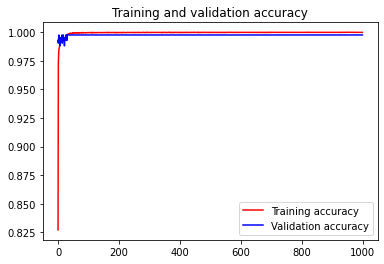

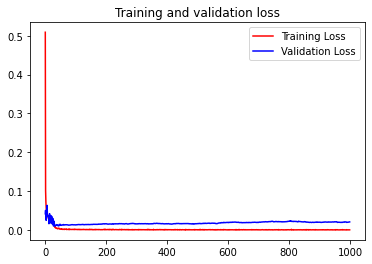

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# model.load_weights(checkpoint_filepath)

In [25]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 5ms/step - loss: 2.5127 - accuracy: 0.9976


[2.512690305709839, 0.9976190328598022]

In [26]:
test_df = testing_images.reshape(testing_images.shape[0],28,28,1)

In [27]:
test_preds = model.predict(test_df)

In [28]:
labels = [np.argmax(X) for X in test_preds]
image_id = [i+1 for i in range(len(test_preds))]

submission = pd.DataFrame({'ImageId': image_id,
                           'Label': labels},
                          index=None)

In [29]:
submission.to_csv('submission.csv', index=False)


In [30]:
pd.read_csv("submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [31]:
test_preds.shape

(28000, 10)